# CCTV와 인구 관계 분석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import random

In [48]:
# 1. data 읽어오기
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv')
# 한글처리 문제가 생길시 : encoding= 'utf-8'
CCTV_Seoul.head()
CCTV_Seoul.tail()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


,기관명,소계,2013년도 이전,2014년,2015년,2016년
20,용산구,2096,1368,218,112,398
21,은평구,2108,1138,224,278,468
22,종로구,1619,464,314,211,630
23,중구,1023,413,190,72,348
24,중랑구,916,509,121,177,109


In [15]:
# CCTV_Seoul df의 컬럼명
CCTV_Seoul.columns
CCTV_Seoul.columns[0]

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

'기관명'

In [64]:
# 컬럼명 변경 : df.rename
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace =True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [20]:
# 서울시 인구현황 가져오기 - 엑셀파일 읽어오기
# 2행을 skip하고 3행을 header 처리 : header = 
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls',
                         header = 2,
                         usecols = 'B,D,G,J,N')
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [21]:
# 컬럼명 변경
# 0 : 구별
# 1 : 인구수
# 2 : 한국인
# 3 : 외국인
# 4 : 고령자
# 컬럼명을 위의 내용과 같이 변경하고 원본 반영 옵션을 적용하시오
pop_Seoul.rename(columns={
    pop_Seoul.columns[0] : '구별',
    pop_Seoul.columns[1] : '인구수',
    pop_Seoul.columns[2] : '한국인',
    pop_Seoul.columns[3] : '외국인',
    pop_Seoul.columns[4] : '고령자'}, inplace = True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [56]:
# del.drop()
# 행인 경우에는 drop()을 주로 사용
# 합계 행 제거
pop_Seoul.drop([0],inplace=True)
pop_Seoul.head()

KeyError: '[0] not found in axis'

In [29]:
# CCTV_Seoul df : 구별 cctv 설치대수 데이터를 포함
# 총 cctv 설치대수별로 정렬
CCTV_Seoul.sort_values(['소계'], ascending = False).head(5)
CCTV_Seoul.sort_values(['소계']).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [70]:
# Data상 최근 3개년동안 cctv 설치가 얼마나 증가했는지 확인하고 새 필드 생성
# 2014+2015+2016 : 최근 3개년 설치대수
# (2014+2015+2016) / 2013 * 100
CCTV_Seoul['최근 증가율'] = ((CCTV_Seoul['2014년']+CCTV_Seoul['2015년']+CCTV_Seoul['2016년'])/CCTV_Seoul['2013년도 이전']*100).round(2)
CCTV_Seoul

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.62
1,강동구,1010,379,99,155,377,166.49
2,강북구,831,369,120,138,204,125.20
3,강서구,911,388,258,184,81,134.79
4,관악구,2109,846,260,390,613,149.29
5,광진구,878,573,78,53,174,53.23
6,구로구,1884,1142,173,246,323,64.97
7,금천구,1348,674,51,269,354,100.00
8,노원구,1566,542,57,451,516,188.93
9,도봉구,825,238,159,42,386,246.64


In [59]:
len(pop_Seoul)
# 각 구별 데이터가 중복되지 않았는지 확인
# 중복 데이터 제거 후 반환 unique()
len(pop_Seoul['구별'].unique())

25

25

In [58]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [54]:
# 구별 값이 nan인 행 반환
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [60]:
pop_Seoul.drop([26],inplace=True)
pop_Seoul.tail()


KeyError: '[26] not found in axis'

In [72]:
CCTV_Seoul.head()
pop_Seoul.head()
data_result=pd.merge(CCTV_Seoul,pop_Seoul, on = '구별')
data_result

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율
0,강남구,3238,1292,430,584,932,150.62
1,강동구,1010,379,99,155,377,166.49
2,강북구,831,369,120,138,204,125.20
3,강서구,911,388,258,184,81,134.79
4,관악구,2109,846,260,390,613,149.29


,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


,구별,소계,2013년도 이전,2014년,2015년,2016년,최근 증가율,인구수,한국인,외국인,고령자
0,강남구,3238,1292,430,584,932,150.62,570500.0,565550.0,4950.0,63167.0
1,강동구,1010,379,99,155,377,166.49,453233.0,449019.0,4214.0,54622.0
2,강북구,831,369,120,138,204,125.20,330192.0,326686.0,3506.0,54813.0
3,강서구,911,388,258,184,81,134.79,603772.0,597248.0,6524.0,72548.0
4,관악구,2109,846,260,390,613,149.29,525515.0,507203.0,18312.0,68082.0
5,광진구,878,573,78,53,174,53.23,372164.0,357211.0,14953.0,42214.0
6,구로구,1884,1142,173,246,323,64.97,447874.0,416487.0,31387.0,56833.0
7,금천구,1348,674,51,269,354,100.00,255082.0,236353.0,18729.0,32970.0
8,노원구,1566,542,57,451,516,188.93,569384.0,565565.0,3819.0,71941.0
9,도봉구,825,238,159,42,386,246.64,348646.0,346629.0,2017.0,51312.0


In [75]:
del data_result['2013년도 이전'] # 원본 반영

In [74]:
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']

In [76]:
data_result.head()

,구별,소계,최근 증가율,인구수,한국인,외국인,고령자
0,강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0
1,강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0
2,강북구,831,125.20,330192.0,326686.0,3506.0,54813.0
3,강서구,911,134.79,603772.0,597248.0,6524.0,72548.0
4,관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0


In [77]:
# 구별 컬럼(유일한 값을 가지는 데이터)
data_result.set_index('구별')

,소계,최근 증가율,인구수,한국인,외국인,고령자
구별,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0
광진구,878,53.23,372164.0,357211.0,14953.0,42214.0
구로구,1884,64.97,447874.0,416487.0,31387.0,56833.0
금천구,1348,100.00,255082.0,236353.0,18729.0,32970.0
노원구,1566,188.93,569384.0,565565.0,3819.0,71941.0


In [87]:
data_result['외국인 비율'] = ((data_result['외국인'])/data_result['인구수']*100).round(2)
data_result['고령자 비율'] = ((data_result['고령자'])/data_result['인구수']*100).round(2)
data_result.set_index('구별', inplace = True)

KeyError: "None of ['구별'] are in the columns"

In [88]:
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96
광진구,878,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34
구로구,1884,64.97,447874.0,416487.0,31387.0,56833.0,7.01,12.69
금천구,1348,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93
노원구,1566,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63


In [ ]:
# 다수의 데이터 중 상관관계가 가장 큰 데이터를 비교
# 인구수와 관련된 각 필드들과 CCTV 소계와 상관계수를 파악해서 상관성이 있는 데이터를 그래프로 표현해라
# 상관관계 계산 함수 numpy.corrcoef(데이터1, 데이터2)

In [90]:
np.corrcoef(data_result['소계'],data_result['인구수'])

array([[1.       , 0.2432198],
       [0.2432198, 1.       ]])

In [92]:
np.corrcoef(data_result['소계'],data_result['고령자 비율'])

array([[ 1.        , -0.25858935],
       [-0.25858935,  1.        ]])

In [93]:
np.corrcoef(data_result['소계'],data_result['외국인 비율'])

array([[ 1.        , -0.05196157],
       [-0.05196157,  1.        ]])

In [94]:
# CCTV와 인구현황 그래프 그리기
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [96]:
# 사용 df
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


<Figure size 720x432 with 0 Axes>

<AxesSubplot:ylabel='구별'>

<Figure size 720x432 with 0 Axes>

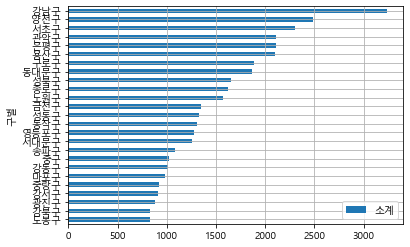

In [104]:
# 구별로 CCTV 설치 대수에 대한 그래프 표현
plt.figure(figsize=(10,6))
data_result.sort_values('소계')[['소계']].plot(kind='barh', grid = True)

<BarContainer object of 25 artists>

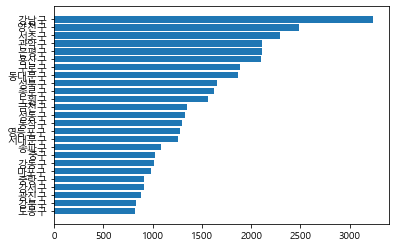

In [110]:
a = data_result['소계'].sort_values()
plt.barh(a.index,a)

In [111]:
# 인구수 대비 cctv가 많이 설치되어 있는 지역을 찾기
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율
구별,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96


In [113]:
# 인구수 대비 cctv 대수의 가공필드 cctv 비율
data_result['CCTV 비율'] = (data_result['소계']/data_result['인구수']*100).round(2)
data_result.head()

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율
구별,,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.57
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05,0.22
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60,0.25
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.15
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96,0.40


<AxesSubplot:ylabel='구별'>

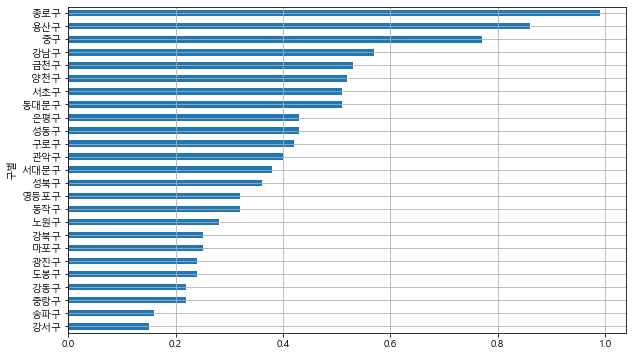

In [118]:
# cctv 비율이 높은 지역순으로 그래프 작성
data_result['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize = (10,6))

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

<function matplotlib.pyplot.show(close=None, block=None)>

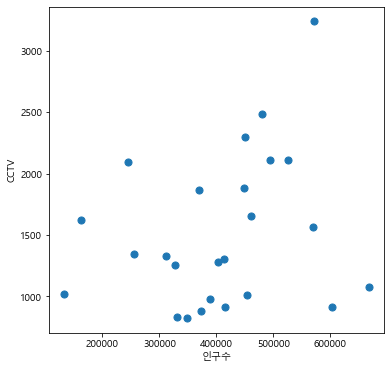

In [120]:
# 인구수와 cctv 소계를 이용한 분산그래프 그리기 마커크기 = 50
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s = 50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.show

#  인구수와 cctv 수를 이용해 최소오차 직선식 계수 구함
polyfit(x,y,n)
y에 대한 x의 그래프에서 오차가 가장 적은 n차 방정식의 계수 반황

In [121]:
fp1= np.polyfit(data_result['인구수'], data_result['소계'],1)
fp1

array([1.15151285e-03, 1.04561312e+03])

In [123]:
# poly1d(계수) - 계수를 이용해서 방정식을 함수로 구성
f1=np.poly1d(fp1) # f1이 함수로 만들어져 있다

1045.6165740925796

In [127]:
fx=np.linspace(100000,700000,100)
fx
f1(fx)

array([100000.        , 106060.60606061, 112121.21212121, 118181.81818182,
       124242.42424242, 130303.03030303, 136363.63636364, 142424.24242424,
       148484.84848485, 154545.45454545, 160606.06060606, 166666.66666667,
       172727.27272727, 178787.87878788, 184848.48484848, 190909.09090909,
       196969.6969697 , 203030.3030303 , 209090.90909091, 215151.51515152,
       221212.12121212, 227272.72727273, 233333.33333333, 239393.93939394,
       245454.54545455, 251515.15151515, 257575.75757576, 263636.36363636,
       269696.96969697, 275757.57575758, 281818.18181818, 287878.78787879,
       293939.39393939, 300000.        , 306060.60606061, 312121.21212121,
       318181.81818182, 324242.42424242, 330303.03030303, 336363.63636364,
       342424.24242424, 348484.84848485, 354545.45454545, 360606.06060606,
       366666.66666667, 372727.27272727, 378787.87878788, 384848.48484848,
       390909.09090909, 396969.6969697 , 403030.3030303 , 409090.90909091,
       415151.51515152, 4

array([1160.76440422, 1167.74326996, 1174.72213569, 1181.70100143,
       1188.67986717, 1195.65873291, 1202.63759864, 1209.61646438,
       1216.59533012, 1223.57419586, 1230.55306159, 1237.53192733,
       1244.51079307, 1251.48965881, 1258.46852454, 1265.44739028,
       1272.42625602, 1279.40512175, 1286.38398749, 1293.36285323,
       1300.34171897, 1307.3205847 , 1314.29945044, 1321.27831618,
       1328.25718192, 1335.23604765, 1342.21491339, 1349.19377913,
       1356.17264487, 1363.1515106 , 1370.13037634, 1377.10924208,
       1384.08810781, 1391.06697355, 1398.04583929, 1405.02470503,
       1412.00357076, 1418.9824365 , 1425.96130224, 1432.94016798,
       1439.91903371, 1446.89789945, 1453.87676519, 1460.85563093,
       1467.83449666, 1474.8133624 , 1481.79222814, 1488.77109387,
       1495.74995961, 1502.72882535, 1509.70769109, 1516.68655682,
       1523.66542256, 1530.6442883 , 1537.62315404, 1544.60201977,
       1551.58088551, 1558.55975125, 1565.53861699, 1572.51748

<Figure size 432x432 with 0 Axes>

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

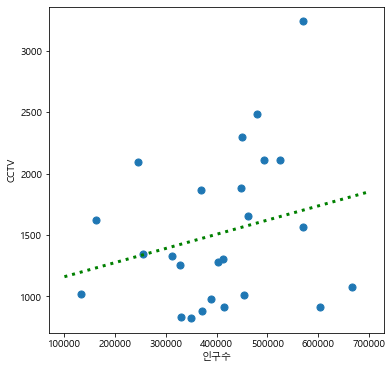

In [129]:
fx=np.linspace(100000,700000,100)
plt.figure(figsize = (6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s =50)
plt.plot(fx,f1(fx),ls = ':', lw =3, color = 'g' )
plt.xlabel('인구수')
plt.ylabel('CCTV')

In [130]:
# 각 구별 인구수에 적절한 CCTV 대수를 계산
f1(data_result['인구수'])

array([1702.55119857, 1567.51674158, 1425.83344942, 1740.86433401,
       1650.75039317, 1474.16474662, 1561.34578424, 1339.34331951,
       1701.26611024, 1447.08346749, 1471.09251034, 1520.63519906,
       1494.29894874, 1422.34551701, 1564.15086953, 1404.014584  ,
       1576.7599352 , 1814.22836898, 1598.31395267, 1509.65552407,
       1326.81601125, 1614.90725279, 1233.10244125, 1199.04069124,
       1522.91864903])

In [133]:
data_result['소계']-f1(data_result['인구수'])

구별
강남구     1535.448801
강동구     -557.516742
강북구     -594.833449
강서구     -829.864334
관악구      458.249607
광진구     -596.164747
구로구      322.654216
금천구        8.656680
노원구     -135.266110
도봉구     -622.083467
동대문구     398.907490
동작구     -218.635199
마포구     -514.298949
서대문구    -168.345517
서초구      732.849130
성동구      -77.014584
성북구       74.240065
송파구     -733.228369
양천구      883.686047
영등포구    -232.655524
용산구      769.183989
은평구      493.092747
종로구      385.897559
중구      -176.040691
중랑구     -606.918649
Name: 소계, dtype: float64

In [135]:
## 오차를 절대값으로 계산 후 상위 10개 구 확인
data_result['오차'] = np.abs(data_result['소계']-f1(data_result['인구수'])).round(2)
data_result

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.57,1535.45
강동구,1010,166.49,453233.0,449019.0,4214.0,54622.0,0.93,12.05,0.22,557.52
강북구,831,125.20,330192.0,326686.0,3506.0,54813.0,1.06,16.60,0.25,594.83
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.15,829.86
관악구,2109,149.29,525515.0,507203.0,18312.0,68082.0,3.48,12.96,0.40,458.25
광진구,878,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34,0.24,596.16
구로구,1884,64.97,447874.0,416487.0,31387.0,56833.0,7.01,12.69,0.42,322.65
금천구,1348,100.00,255082.0,236353.0,18729.0,32970.0,7.34,12.93,0.53,8.66
노원구,1566,188.93,569384.0,565565.0,3819.0,71941.0,0.67,12.63,0.28,135.27


In [143]:
df_sort= data_result.sort_values(by = '오차', ascending = False)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.57,1535.45
양천구,2482,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,0.52,883.69
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.15,829.86
용산구,2096,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,0.86,769.18
송파구,1081,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,0.16,733.23
서초구,2297,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,0.51,732.85
도봉구,825,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72,0.24,622.08
중랑구,916,79.96,414503.0,409882.0,4621.0,56774.0,1.11,13.70,0.22,606.92
광진구,878,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34,0.24,596.16


In [144]:
df_sort.head(10)

,소계,최근 증가율,인구수,한국인,외국인,고령자,외국인 비율,고령자 비율,CCTV 비율,오차
구별,,,,,,,,,,
강남구,3238,150.62,570500.0,565550.0,4950.0,63167.0,0.87,11.07,0.57,1535.45
양천구,2482,34.67,479978.0,475949.0,4029.0,52975.0,0.84,11.04,0.52,883.69
강서구,911,134.79,603772.0,597248.0,6524.0,72548.0,1.08,12.02,0.15,829.86
용산구,2096,53.22,244203.0,229456.0,14747.0,36231.0,6.04,14.84,0.86,769.18
송파구,1081,104.35,667483.0,660584.0,6899.0,72506.0,1.03,10.86,0.16,733.23
서초구,2297,63.37,450310.0,445994.0,4316.0,51733.0,0.96,11.49,0.51,732.85
도봉구,825,246.64,348646.0,346629.0,2017.0,51312.0,0.58,14.72,0.24,622.08
중랑구,916,79.96,414503.0,409882.0,4621.0,56774.0,1.11,13.70,0.22,606.92
광진구,878,53.23,372164.0,357211.0,14953.0,42214.0,4.02,11.34,0.24,596.16


<Figure size 720x720 with 0 Axes>

Text(581910.0, 3173.24, '강남구')

Text(489577.56, 2432.36, '양천구')

Text(615847.4400000001, 892.78, '강서구')

Text(249087.06, 2054.08, '용산구')

Text(680832.66, 1059.3799999999999, '송파구')

Text(459316.2, 2251.06, '서초구')

Text(355618.92, 808.5, '도봉구')

Text(422793.06, 897.68, '중랑구')

Text(379607.28, 860.4399999999999, '광진구')

Text(336795.84, 814.38, '강북구')

Text(0.5, 0, '인구수')

Text(0, 0.5, 'CCTV')

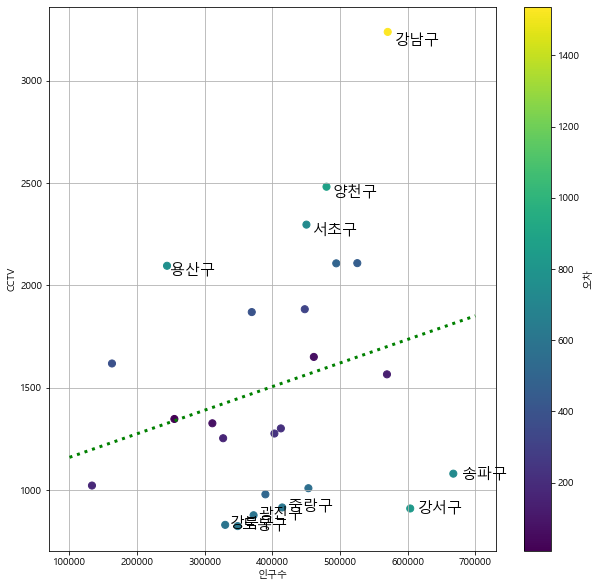

In [159]:
# 그래프에 글자 출력하는 함수
# plt.text(x좌표, y좌표, test, fontsize)
# 점보다 약간 오른쪽 아래에 출력되도록 좌표를 변경 후 출력
plt.figure(figsize = (10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s =50, c = data_result['오차'])
plt.plot(fx,f1(fx),ls = ':', lw =3, color = 'g' )

for n in range(10) :
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, df_sort.index[n], fontsize = 15)
    

plt.xlabel('인구수')
plt.colorbar(label = '오차')
plt.ylabel('CCTV')
plt.grid()

In [155]:
data_result.to_csv('CCTV_result.csv')